In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import moviepy.editor as mpy
import cv2
import os

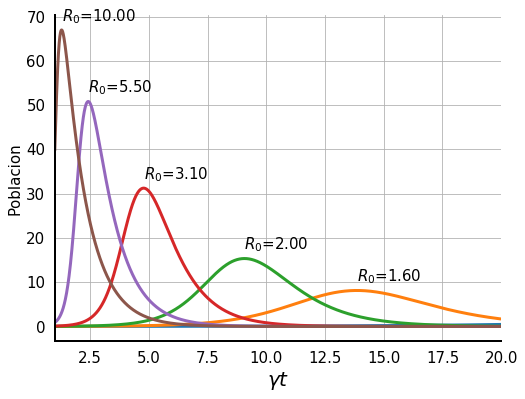

In [3]:
%matplotlib inline
g=1/15
R0arr=g*np.array([1.2,1.6,2.0,3.1,5.5,10])
Ptot=100
P=100
I=1/100
S=P-I
R=0
t=0
dt=0.001
fig, ax = plt.subplots(1,1, figsize=(8,6))
for R0 in R0arr:
    P=100
    I=1/100
    S=P-I
    R=0
    t=0
    dt=0.001
    Iarr=np.array([I])
    Sarr=np.array([S])
    Rarr=np.array([R])
    tarr=np.array([t])
    mx=0
    my=0
    count=0
    while t<300:
        P=S+I+R
        ds=-R0*I*S*dt/P
        di=(R0*I*S/P-g*I)*dt
        dr=g*I*dt
        S+=ds
        I+=di
        R+=dr
        t+=dt
        count+=1
        if I>my:
            my=I
            mx=t
        if count>99:
            Iarr=np.concatenate((Iarr,[I]),axis=0)
            Sarr=np.concatenate((Sarr,[S]),axis=0)
            Rarr=np.concatenate((Rarr,[R]),axis=0)
            tarr=np.concatenate((tarr,[t]),axis=0)
            count=0
    plt.plot(g*tarr,Iarr,lw=3)
    if mx<300:
        plt.text(g*mx,my+2,r"$R_0$=%2.2f"%(R0/g),fontsize=15)
ax.set_xlim([1,300*g])
ax.grid()
plt.xlabel("$\gamma t$",size=20)
plt.ylabel("Poblacion",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.savefig('./Peaks.eps',bbox_inches='tight',dpi=600)
plt.savefig('./Peaks.png',bbox_inches='tight',dpi=600)

In [4]:

g=1/15#tasa de recuperacion
R0=2.5*g#tasa de infeccion
P=100#poblacion total
I=1/100#Infectados iniciales
S=P-I #Suceptibles iniciales
R=0 #Recuperados iniciales
t=0 #tiempo inicial
dt=0.001 #paso de tiempo
Iarr=np.array([I])
Sarr=np.array([S])
Rarr=np.array([R])
tarr=np.array([t])
count=10
while t<300:#tiempo maximo (300 dias)
    P=S+I+R
    ds=-R0*I*S*dt/P
    di=(R0*I*S/P-g*I)*dt
    dr=g*I*dt
    S=S+ds
    I+=di
    R+=dr
    t+=dt
    count+=1
    if count>99:
        Iarr=np.concatenate((Iarr,[I]),axis=0)
        Sarr=np.concatenate((Sarr,[S]),axis=0)
        Rarr=np.concatenate((Rarr,[R]),axis=0)
        tarr=np.concatenate((tarr,[t]),axis=0)
        count=0


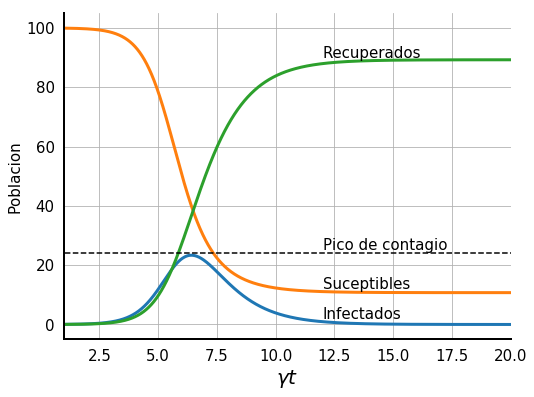

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(g*tarr,Iarr,lw=3)
plt.plot(g*tarr,Sarr,lw=3)
plt.plot(g*tarr,Rarr,lw=3)
ax.set_xlim([1,300*g])
ax.grid()
plt.xlabel("$\gamma t$",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Poblacion",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.text(12,90,'Recuperados',fontsize=15)
plt.text(12,12,'Suceptibles',fontsize=15)
plt.text(12,2,'Infectados',fontsize=15)
plt.text(12,25,'Pico de contagio',fontsize=15)
#plt.xscale('log')
plt.plot([0,300],[24,24],c='k',ls='--')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./SIRexample.eps',bbox_inches='tight',dpi=600)
plt.savefig('./SIRexample.png',bbox_inches='tight',dpi=600)

In [6]:
%matplotlib agg
g=1/15
R0arr=g*np.array([1.01,1.05,1.1,1.2,1.4,1.6,1.8,2.0,2.3,2.5,2.7,3.1,3.5,4,4.7,5.5,7,8,9,10])
Ptot=100
P=100
I=1/100
S=P-I
R=0
t=0
dt=0.001
maxarr=[]
Iarr=np.array([I])
Sarr=np.array([S])
Rarr=np.array([R])
tarr=np.array([t])
peakarr=np.array([])


for R0 in R0arr:
    P=100
    I=1/100
    S=P-I
    R=0
    t=0
    dt=0.001
    Iarr=np.array([I])
    Sarr=np.array([S])
    Rarr=np.array([R])
    tarr=np.array([t])
    count=10
    while t<300:
        P=S+I+R
        ds=-R0*I*S*dt/P
        di=(R0*I*S/P-g*I)*dt
        dr=g*I*dt
        S+=ds
        I+=di
        R+=dr
        t+=dt
        count+=1
        if count>99:
            Iarr=np.concatenate((Iarr,[I]),axis=0)
            Sarr=np.concatenate((Sarr,[S]),axis=0)
            Rarr=np.concatenate((Rarr,[R]),axis=0)
            count=0
    maxarr.append(np.max(Iarr))
    

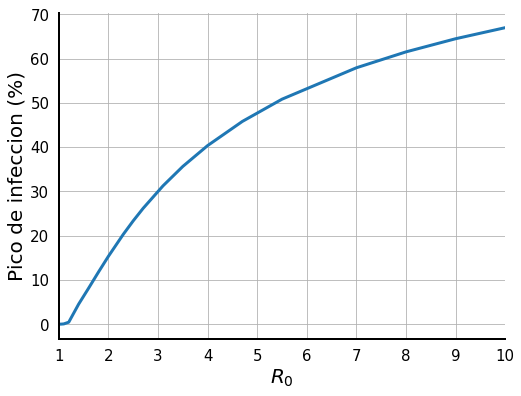

In [7]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(R0arr/g,maxarr,lw=3)
ax.set_xlim([1,10])
ax.grid()
plt.xlabel("$R_0$",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Pico de infeccion (%)",size=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
#plt.text(220,70,'Recuperados',fontsize=15)
#plt.text(220,33,'Suceptibles',fontsize=15)
#plt.text(220,2,'Infectados',fontsize=15)
#plt.xscale('log')
#plt.plot([0,300],[10,10],c='k',ls='--')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./peakvsR0.eps',bbox_inches='tight',dpi=600)
plt.savefig('./peakvsR0.png',bbox_inches='tight',dpi=600)

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

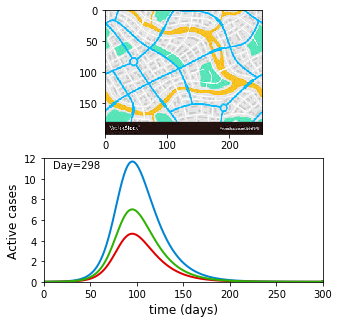

In [10]:
%matplotlib agg
g=1/15
Rarrday=1.5*g*np.array([2.0,2.6,3.0])
Rarrnig=0.5*g*np.array([2.0,2.6,3.0])

rat=1
alpha=rat**2
Ptot=np.array([50,20,30])
Iarray=np.array([0,0,10/1000])
Sarray=Ptot-Iarray
Rarray=np.array([0,0,0])

Transarrday=np.array([[-3/5,5/20,8/30],[1/5,-12/20,2/5],[2/5,7/20,-2/3]])
Transarrnig=np.array([[-13/33,1/3,20/37],[5/33,-11/15,7/37],[8/33,2/5,-27/37]])
Iarr=np.array([[1,0,0],[0,1,0],[0,0,1]])
movdayarr=Iarr+alpha*Transarrday
movnigarr=Iarr+alpha*Transarrnig
t=0
dt=0.001
count=0
day=0
Sdif=np.array([Sarray])
Idif=np.array([Iarray])
Stotar=np.array([np.sum(Sarray)])
Itotar=np.array([np.sum(Iarray)])
Rtotar=np.array([np.sum(Rarray)])
ttotar=np.array([0.])
img1 = cv2.imread('./download.jpg',1)
height , width , layers =  img1.shape
video = cv2.VideoWriter('./video.mp4',-1,1,(width,height))
m=0
count2=1
while t<300:    
    Sarray=np.matmul(movdayarr,Sarray)
    Iarray=np.matmul(movdayarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<0.5:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrday*Sarray*Iarray*dt/(Ptot)        
        di=Rarrday*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt    
    Sarray=np.matmul(movnigarr,Sarray)
    Iarray=np.matmul(movnigarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<1:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrnig*Sarray*Iarray*dt/(Ptot)        
        di=Rarrnig*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    count=0
    Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    ttotar=np.concatenate((ttotar,[t]),axis=0)
    Idif=np.concatenate((Idif,[Iarray]),axis=0)
    Sdif=np.concatenate((Sdif,[Iarray]),axis=0)
    count2+=1
    carr=['#0083D1','#E00000','#2DB102']
    if count2==3:        
        plt.clf()
        fig, ax = plt.subplots(2,1, figsize=(5,5))    
        ax[0].imshow(img1)
        x=[150,50,200]
        y=[50,150,140]
        r=[2,3,4]
        for i in range(len(Sarray)):
            circle1 = plt.Circle((x[i],y[i]), 3*Iarray[i], color=carr[i])
            ax[0].add_artist(circle1)
            ax[1].plot(ttotar,Idif[:,i],lw=2,c=carr[i])
            ax[1].scatter(ttotar[-1],Idif[-1,i],c=carr[i],s=10)
        ax[1].set_xlim([0,300])
        ax[1].set_ylim([0,12])
        ax[1].set_xlabel('time (days)',fontsize=12)
        ax[1].set_ylabel('Active cases',fontsize=12)
        ax[1].text(10,11,'Day=%i'%t)
        
        #ax[0].annotate('', xy=(80, 120), xytext=(130, 70),
        #    arrowprops=dict(facecolor='black',arrowstyle='<|-|>'))
        
        plt.savefig('./images/'+str(m+10000)+'.jpg',bbox_inches='tight')
        m+=1
        count2=0


    
    #ax.add_artist(circle1)
    #print(np.sum(Ptot))

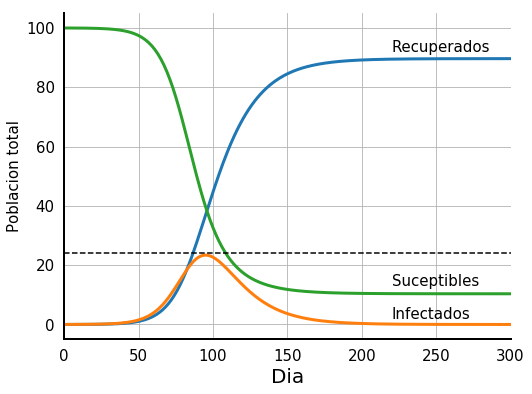

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(ttotar,Rtotar,lw=3)
plt.plot(ttotar,Itotar,lw=3)
plt.plot(ttotar,Stotar,lw=3)
ax.set_xlim([0,300])
ax.grid()
plt.xlabel("Dia",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Poblacion total",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.text(220,92,'Recuperados',fontsize=15)
plt.text(220,13,'Suceptibles',fontsize=15)
plt.text(220,2,'Infectados',fontsize=15)
plt.plot([0,300],[24,24],c='k',ls='--')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./SIRfull.eps',bbox_inches='tight',dpi=600)
plt.savefig('./SIRfull.png',bbox_inches='tight',dpi=600)

In [14]:
image_folder = './images'
video_name = 'video.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

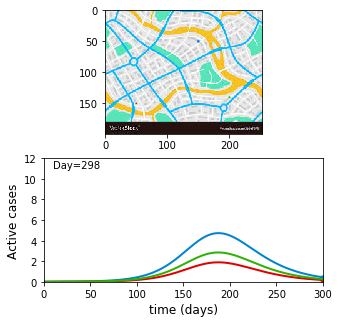

In [15]:
%matplotlib agg
g=1/15
Rarrday=1.5*g*np.array([2.0,2.6,3.0])/1.5
Rarrnig=0.5*g*np.array([2.0,2.6,3.0])/1.5

rat=1
alpha=rat**2
Ptot=np.array([50,20,30])
Iarray=np.array([0,0,10/1000])
Sarray=Ptot-Iarray
Rarray=np.array([0,0,0])

Transarrday=np.array([[-3/5,5/20,8/30],[1/5,-12/20,2/5],[2/5,7/20,-2/3]])
Transarrnig=np.array([[-13/33,1/3,20/37],[5/33,-11/15,7/37],[8/33,2/5,-27/37]])
Iarr=np.array([[1,0,0],[0,1,0],[0,0,1]])
movdayarr=Iarr+alpha*Transarrday
movnigarr=Iarr+alpha*Transarrnig
t=0
dt=0.001
count=0
day=0
Sdif=np.array([Sarray])
Idif=np.array([Iarray])
Stotar=np.array([np.sum(Sarray)])
Itotar=np.array([np.sum(Iarray)])
Rtotar=np.array([np.sum(Rarray)])
ttotar=np.array([0.])
img1 = cv2.imread('./download.jpg',1)
height , width , layers =  img1.shape
video = cv2.VideoWriter('./video.mp4',-1,1,(width,height))
m=0
count2=1
while t<300:    
    Sarray=np.matmul(movdayarr,Sarray)
    Iarray=np.matmul(movdayarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<0.5:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrday*Sarray*Iarray*dt/(Ptot)        
        di=Rarrday*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    
    Sarray=np.matmul(movnigarr,Sarray)
    Iarray=np.matmul(movnigarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<1:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrnig*Sarray*Iarray*dt/(Ptot)        
        di=Rarrnig*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    count=0
    Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    ttotar=np.concatenate((ttotar,[t]),axis=0)
    Idif=np.concatenate((Idif,[Iarray]),axis=0)
    Sdif=np.concatenate((Sdif,[Iarray]),axis=0)
    count2+=1
    carr=['#0083D1','#E00000','#2DB102']
    if count2==3:        
        plt.clf()
        fig, ax = plt.subplots(2,1, figsize=(5,5))    
        ax[0].imshow(img1)
        x=[150,50,200]
        y=[50,150,140]
        r=[2,3,4]
        for i in range(len(Sarray)):
            circle1 = plt.Circle((x[i],y[i]), 3*Iarray[i], color=carr[i])
            ax[0].add_artist(circle1)
            ax[1].plot(ttotar,Idif[:,i],lw=2,c=carr[i])
            ax[1].scatter(ttotar[-1],Idif[-1,i],c=carr[i],s=10)
        ax[1].set_xlim([0,300])
        ax[1].set_ylim([0,12])
        ax[1].set_xlabel('time (days)',fontsize=12)
        ax[1].set_ylabel('Active cases',fontsize=12)
        ax[1].text(10,11,'Day=%i'%t)
        
        #ax[0].annotate('', xy=(80, 120), xytext=(130, 70),
        #    arrowprops=dict(facecolor='black',arrowstyle='<|-|>'))
        
        plt.savefig('./images/'+str(m+10000)+'.jpg',bbox_inches='tight')
        m+=1
        count2=0


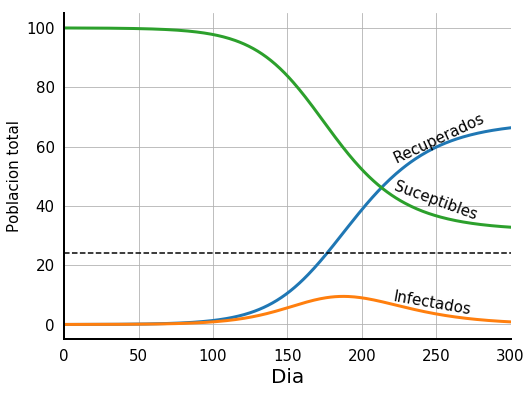

In [16]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(ttotar,Rtotar,lw=3)
plt.plot(ttotar,Itotar,lw=3)
plt.plot(ttotar,Stotar,lw=3)
ax.set_xlim([0,300])
ax.grid()
plt.xlabel("Dia",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Poblacion total",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.text(220,45,'Suceptibles',fontsize=15,rotation=-20)
plt.text(220,68,'Recuperados',fontsize=15,rotation=25)
plt.text(220,8,'Infectados',fontsize=15,rotation=-10)
plt.plot([0,300],[24,24],c='k',ls='--')
#plt.yscale('log')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./SIRfull2.eps',bbox_inches='tight',dpi=600)
plt.savefig('./SIRfull2.png',bbox_inches='tight',dpi=600)

In [17]:
image_folder = './images'
video_name = 'video2.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

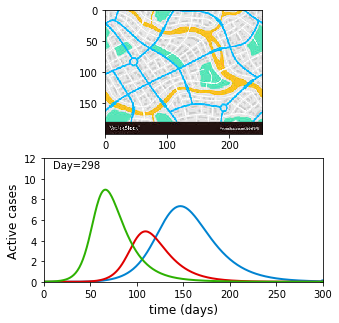

In [18]:
%matplotlib agg
g=1/15
Rarrday=1.5*g*np.array([2.0,2.6,3.0])
Rarrnig=0.5*g*np.array([2.0,2.6,3.0])

rat=0.02
alpha=rat**2
Ptot=np.array([50,20,30])
Iarray=np.array([0,0,10/1000])
Sarray=Ptot-Iarray
Rarray=np.array([0,0,0])

Transarrday=np.array([[-3/5,5/20,8/30],[1/5,-12/20,2/5],[2/5,7/20,-2/3]])
Transarrnig=np.array([[-13/33,1/3,20/37],[5/33,-11/15,7/37],[8/33,2/5,-27/37]])
Iarr=np.array([[1,0,0],[0,1,0],[0,0,1]])
movdayarr=Iarr+alpha*Transarrday
movnigarr=Iarr+alpha*Transarrnig
t=0
dt=0.001
count=0
day=0
Sdif=np.array([Sarray])
Idif=np.array([Iarray])
Stotar=np.array([np.sum(Sarray)])
Itotar=np.array([np.sum(Iarray)])
Rtotar=np.array([np.sum(Rarray)])
ttotar=np.array([0.])
img1 = cv2.imread('./download.jpg',1)
height , width , layers =  img1.shape
video = cv2.VideoWriter('./video.mp4',-1,1,(width,height))
m=0
count2=1
while t<300:    
    Sarray=np.matmul(movdayarr,Sarray)
    Iarray=np.matmul(movdayarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<0.5:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrday*Sarray*Iarray*dt/(Ptot)        
        di=Rarrday*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    #Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    #Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    #Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    #ttotar=np.concatenate((ttotar,[t]),axis=0)
    #Sdif=np.concatenate((Sdif,[Sarray]),axis=0)
    #Idif=np.concatenate((Idif,[Iarray]),axis=0)
    
    Sarray=np.matmul(movnigarr,Sarray)
    Iarray=np.matmul(movnigarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<1:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrnig*Sarray*Iarray*dt/(Ptot)        
        di=Rarrnig*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    count=0
    Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    ttotar=np.concatenate((ttotar,[t]),axis=0)
    Idif=np.concatenate((Idif,[Iarray]),axis=0)
    Sdif=np.concatenate((Sdif,[Iarray]),axis=0)
    count2+=1
    carr=['#0083D1','#E00000','#2DB102']
    if count2==3:        
        plt.clf()
        fig, ax = plt.subplots(2,1, figsize=(5,5))    
        ax[0].imshow(img1)
        x=[150,50,200]
        y=[50,150,140]
        r=[2,3,4]
        for i in range(len(Sarray)):
            circle1 = plt.Circle((x[i],y[i]), 3*Iarray[i], color=carr[i])
            ax[0].add_artist(circle1)
            ax[1].plot(ttotar,Idif[:,i],lw=2,c=carr[i])
            ax[1].scatter(ttotar[-1],Idif[-1,i],c=carr[i],s=10)
        ax[1].set_xlim([0,300])
        ax[1].set_ylim([0,12])
        ax[1].set_xlabel('time (days)',fontsize=12)
        ax[1].set_ylabel('Active cases',fontsize=12)
        ax[1].text(10,11,'Day=%i'%t)
        
        #ax[0].annotate('', xy=(80, 120), xytext=(130, 70),
        #    arrowprops=dict(facecolor='black',arrowstyle='<|-|>'))
        
        plt.savefig('./images/'+str(m+10000)+'.jpg',bbox_inches='tight')
        m+=1
        count2=0

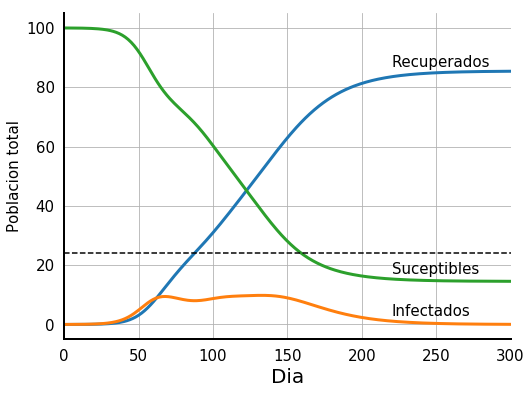

In [19]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(ttotar,Rtotar,lw=3)
plt.plot(ttotar,Itotar,lw=3)
plt.plot(ttotar,Stotar,lw=3)
ax.set_xlim([0,300])
ax.grid()
plt.xlabel("Dia",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Poblacion total",size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.text(220,87,'Recuperados',fontsize=15)
plt.text(220,17,'Suceptibles',fontsize=15)
plt.text(220,3,'Infectados',fontsize=15)
plt.plot([0,300],[24,24],c='k',ls='--')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./SIRfull3.eps',bbox_inches='tight',dpi=600)
plt.savefig('./SIRfull3.png',bbox_inches='tight',dpi=600)

In [20]:
image_folder = './images'
video_name = 'video3.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

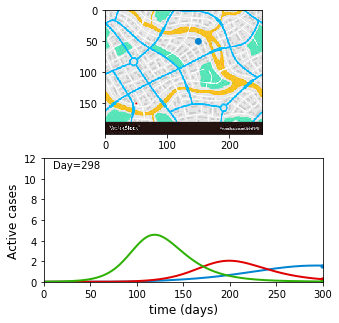

In [21]:
%matplotlib agg
g=1/15
Rarrday=1.5*g*np.array([2.0,2.6,3.0])/1.5
Rarrnig=0.5*g*np.array([2.0,2.6,3.0])/1.5

rat=0.02
alpha=rat**2
Ptot=np.array([50,20,30])
Iarray=np.array([0,0,10/1000])
Sarray=Ptot-Iarray
Rarray=np.array([0,0,0])

Transarrday=np.array([[-3/5,5/20,8/30],[1/5,-12/20,2/5],[2/5,7/20,-2/3]])
Transarrnig=np.array([[-13/33,1/3,20/37],[5/33,-11/15,7/37],[8/33,2/5,-27/37]])
Iarr=np.array([[1,0,0],[0,1,0],[0,0,1]])
movdayarr=Iarr+alpha*Transarrday
movnigarr=Iarr+alpha*Transarrnig
t=0
dt=0.001
count=0
day=0
Sdif=np.array([Sarray])
Idif=np.array([Iarray])
Stotar=np.array([np.sum(Sarray)])
Itotar=np.array([np.sum(Iarray)])
Rtotar=np.array([np.sum(Rarray)])
ttotar=np.array([0.])
img1 = cv2.imread('./download.jpg',1)
height , width , layers =  img1.shape
video = cv2.VideoWriter('./video.mp4',-1,1,(width,height))
m=0
count2=1
while t<300:    
    Sarray=np.matmul(movdayarr,Sarray)
    Iarray=np.matmul(movdayarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<0.5:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrday*Sarray*Iarray*dt/(Ptot)        
        di=Rarrday*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    #Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    #Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    #Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    #ttotar=np.concatenate((ttotar,[t]),axis=0)
    #Sdif=np.concatenate((Sdif,[Sarray]),axis=0)
    #Idif=np.concatenate((Idif,[Iarray]),axis=0)
    
    Sarray=np.matmul(movnigarr,Sarray)
    Iarray=np.matmul(movnigarr,Iarray)
    Rarray=np.matmul(movdayarr,Rarray)
    while count<1:
        Ptot=Sarray+Iarray+Rarray
        ds=-Rarrnig*Sarray*Iarray*dt/(Ptot)        
        di=Rarrnig*Sarray*Iarray*dt/(Ptot)-Iarray*dt*g
        dR=Iarray*dt*g
        Sarray=Sarray+ds
        Iarray=Iarray+di
        Rarray=Rarray+dR
        t+=dt
        count+=dt
    count=0
    Stotar=np.concatenate((Stotar,[np.sum(Sarray)]),axis=0)
    Itotar=np.concatenate((Itotar,[np.sum(Iarray)]),axis=0)
    Rtotar=np.concatenate((Rtotar,[np.sum(Rarray)]),axis=0)
    ttotar=np.concatenate((ttotar,[t]),axis=0)
    Idif=np.concatenate((Idif,[Iarray]),axis=0)
    Sdif=np.concatenate((Sdif,[Iarray]),axis=0)
    count2+=1
    carr=['#0083D1','#E00000','#2DB102']
    if count2==3:        
        plt.clf()
        fig, ax = plt.subplots(2,1, figsize=(5,5))    
        ax[0].imshow(img1)
        x=[150,50,200]
        y=[50,150,140]
        r=[2,3,4]
        for i in range(len(Sarray)):
            circle1 = plt.Circle((x[i],y[i]), 3*Iarray[i], color=carr[i])
            ax[0].add_artist(circle1)
            ax[1].plot(ttotar,Idif[:,i],lw=2,c=carr[i])
            ax[1].scatter(ttotar[-1],Idif[-1,i],c=carr[i],s=10)
        ax[1].set_xlim([0,300])
        ax[1].set_ylim([0,12])
        ax[1].set_xlabel('time (days)',fontsize=12)
        ax[1].set_ylabel('Active cases',fontsize=12)
        ax[1].text(10,11,'Day=%i'%t)
        
        #ax[0].annotate('', xy=(80, 120), xytext=(130, 70),
        #    arrowprops=dict(facecolor='black',arrowstyle='<|-|>'))
        
        plt.savefig('./images/'+str(m+10000)+'.jpg',bbox_inches='tight')
        m+=1
        count2=0

In [22]:
image_folder = './images'
video_name = 'video4.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'MP4V'), 5, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

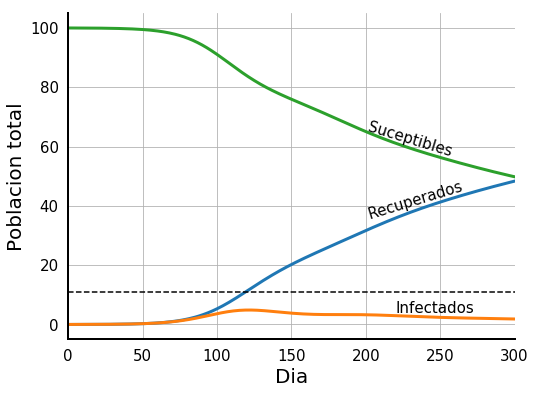

In [23]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(ttotar,Rtotar,lw=3)
plt.plot(ttotar,Itotar,lw=3)
plt.plot(ttotar,Stotar,lw=3)
ax.set_xlim([0,300])
ax.grid()
plt.xlabel("Dia",size=20)
#plt.grid()
#plt.legend(loc=4,fontsize=15)
#plt.yscale('log')
plt.ylabel("Poblacion total",size=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.text(200,65,'Suceptibles',fontsize=15,rotation=-17)
plt.text(200,45,'Recuperados',fontsize=15,rotation=17)
plt.text(220,4,'Infectados',fontsize=15)
plt.plot([0,300],[11,11],c='k',ls='--')
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
#plt.savefig('./SIRfull.eps',bbox_inches='tight',dpi=600)
#plt.savefig('./SIRfull.png',bbox_inches='tight',dpi=600)
#ax.set_title('Casos Reportados por localidad en Bogota (10 de Mayo de 2020)',fontsize=18)
plt.savefig('./SIRfull4.eps',bbox_inches='tight',dpi=600)
plt.savefig('./SIRfull4.png',bbox_inches='tight',dpi=600)